In [1]:
from functions.data_functions import load_data, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
import arviz as az
import numpy as np

## Read in data and preprocess data

In [2]:
pca_df = load_data('BEACON', 'pca_df')

In [3]:
comp = ['comp_1', 'comp_2','comp_3']

In [5]:
pca_df

,index,G_Number,comp_1_t1,comp_2_t1,comp_3_t1,B_Number,comp_1_t2,comp_2_t2,comp_3_t2,group,comp_1_t1_demean,comp_2_t1_demean,comp_3_t1_demean,group_ind
0,0,G1038,-3.397712,-0.039728,0.044067,B1002,-2.751847,-1.763316,2.199746,HC,-3.397712,-0.039728,0.044067,0
1,1,G1010,-3.759757,-0.312506,0.406467,B1003,-3.441539,-0.316748,-0.210088,HC,-3.759757,-0.312506,0.406467,0
2,2,G1014,-3.532270,-0.211892,0.493511,B1004,-1.389329,0.311159,0.983941,HC,-3.532270,-0.211892,0.493511,0
3,3,G1056,-2.459692,-0.062705,-0.095992,B1006,-1.050591,1.116984,0.019420,HC,-2.459692,-0.062705,-0.095992,0
4,4,G1023,-1.476319,-0.129427,1.175674,B1007,-1.181176,-0.783917,0.744101,HC,-1.476319,-0.129427,1.175674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,G2141,2.462581,-0.667664,-0.436650,B2091,2.025310,1.042486,-0.784687,AN,2.462581,-0.667664,-0.436650,1
130,130,G2138,-1.634660,-0.686854,-1.347601,B2092,0.157375,-0.139806,-0.360662,AN,-1.634660,-0.686854,-1.347601,1
131,131,G2140,2.637032,-2.079384,-1.025924,B2093,3.998414,-2.064403,-1.245633,AN,2.637032,-2.079384,-1.025924,1
132,132,G2105,2.295672,-0.339904,0.279827,B2094,4.474773,-1.406758,0.090732,AN,2.295672,-0.339904,0.279827,1


## Load pickle objects

In [2]:
t1_models = load_pickle('t1_models')
t2_models = load_pickle('t2_models')
fitted_models = load_pickle('fitted_models_group')
model_summary = load_pickle('model_summary_group')
correlation_coeffients = load_pickle('correlation_coeffients_group')

## Exploatory data analysis

<AxesSubplot: xlabel='group', ylabel='comp_3_t2'>

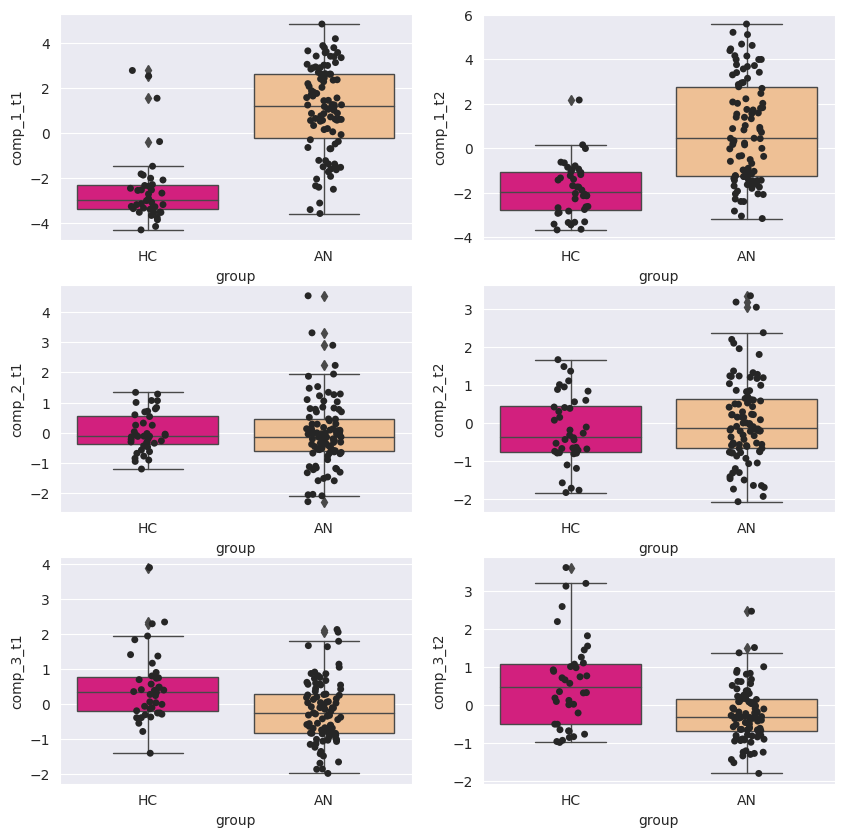

In [7]:
fig,ax = plt.subplots(3,2, figsize=(10,10))
sns.boxplot(x='group', y='comp_1_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][0])
sns.stripplot(x="group", y="comp_1_t1", data=pca_df, color=".15", ax=ax[0][0])
sns.boxplot(x='group', y='comp_1_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[0][1])
sns.stripplot(x="group", y="comp_1_t2", data=pca_df, color=".15", ax=ax[0][1])

sns.boxplot(x='group', y='comp_2_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][0])
sns.stripplot(x="group", y="comp_2_t1", data=pca_df, color=".15", ax=ax[1][0])
sns.boxplot(x='group', y='comp_2_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[1][1])
sns.stripplot(x="group", y="comp_2_t2", data=pca_df, color=".15", ax=ax[1][1])

sns.boxplot(x='group', y='comp_3_t1', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][0])
sns.stripplot(x="group", y="comp_3_t1", data=pca_df, color=".15", ax=ax[2][0])
sns.boxplot(x='group', y='comp_3_t2', data=pca_df, linewidth=1, palette='Accent_r', ax=ax[2][1])
sns.stripplot(x="group", y="comp_3_t2", data=pca_df, color=".15", ax=ax[2][1])

In [8]:
hc = pca_df[pca_df['group'] == 'HC']
print(hc.describe())

           index  comp_1_t1  comp_2_t1  comp_3_t1  comp_1_t2  comp_2_t2  \
count  40.000000  40.000000  40.000000  40.000000  40.000000  40.000000   
mean   19.500000  -2.499735   0.021506   0.475583  -1.859560  -0.167229   
std    11.690452   1.588232   0.651225   0.988159   1.213751   0.913216   
min     0.000000  -4.316352  -1.193064  -1.398626  -3.668393  -1.824670   
25%     9.750000  -3.375888  -0.361795  -0.200299  -2.769730  -0.748887   
50%    19.500000  -2.966412  -0.107922   0.351181  -1.953785  -0.348713   
75%    29.250000  -2.325026   0.556527   0.771932  -1.074796   0.461711   
max    39.000000   2.793782   1.340436   3.911124   2.175929   1.675071   

       comp_3_t2  comp_1_t1_demean  comp_2_t1_demean  comp_3_t1_demean  \
count  40.000000         40.000000         40.000000         40.000000   
mean    0.578540         -2.499735          0.021506          0.475583   
std     1.203302          1.588232          0.651225          0.988159   
min    -0.988150         -4.

In [9]:
an = pca_df[pca_df['group'] == 'AN']
print(an.describe())

            index  comp_1_t1  comp_2_t1  comp_3_t1  comp_1_t2  comp_2_t2  \
count   94.000000  94.000000  94.000000  94.000000  94.000000  94.000000   
mean    86.500000   1.063717  -0.009152  -0.202376   0.791302   0.071161   
std     27.279418   1.950862   1.126945   0.867612   2.293616   1.119264   
min     40.000000  -3.586240  -2.272124  -1.976353  -3.157525  -2.064403   
25%     63.250000  -0.237574  -0.586811  -0.828213  -1.259675  -0.647353   
50%     86.500000   1.218671  -0.136302  -0.259192   0.454006  -0.114253   
75%    109.750000   2.636039   0.461186   0.289827   2.752226   0.645741   
max    133.000000   4.865881   4.533965   2.139006   5.594202   3.356895   

       comp_3_t2  comp_1_t1_demean  comp_2_t1_demean  comp_3_t1_demean  \
count  94.000000         94.000000         94.000000         94.000000   
mean   -0.246187          1.063717         -0.009152         -0.202376   
std     0.705538          1.950862          1.126945          0.867612   
min    -1.805558   

<AxesSubplot: >

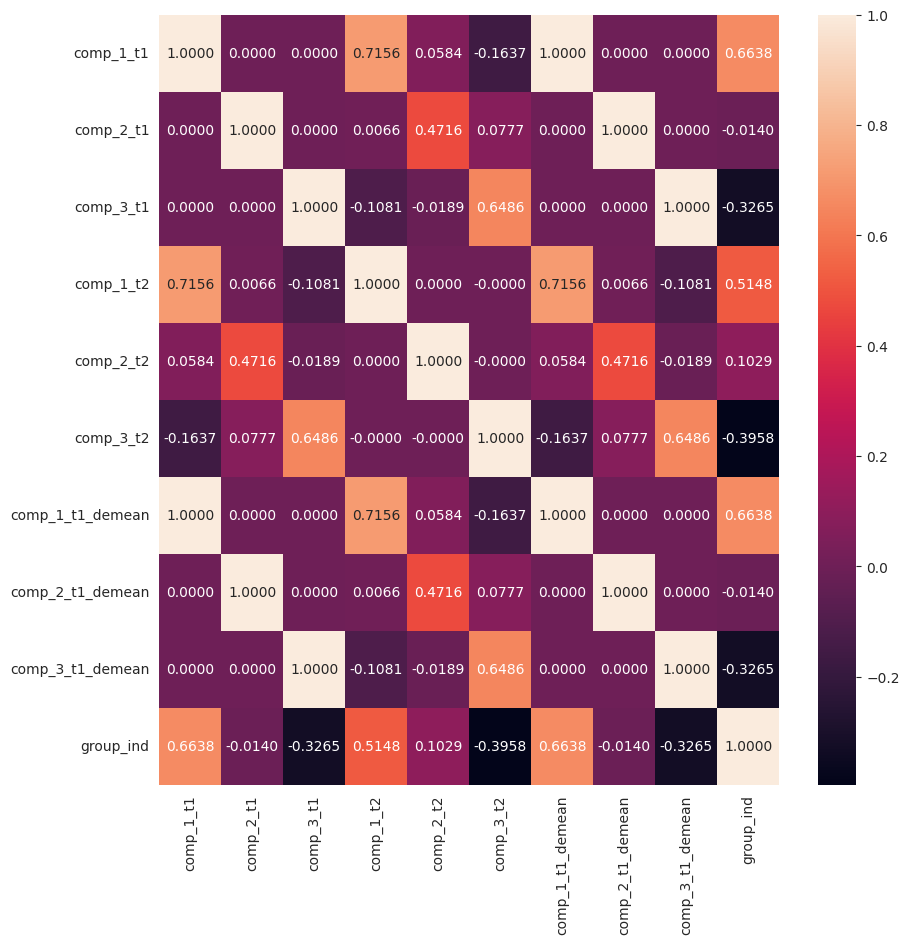

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(pca_df[['comp_1_t1','comp_2_t1', 'comp_3_t1', 'comp_1_t2', 'comp_2_t2', 'comp_3_t2', 'comp_1_t1_demean', 'comp_2_t1_demean', 'comp_3_t1_demean','group_ind']].corr(),  annot=True,  fmt=".4f")

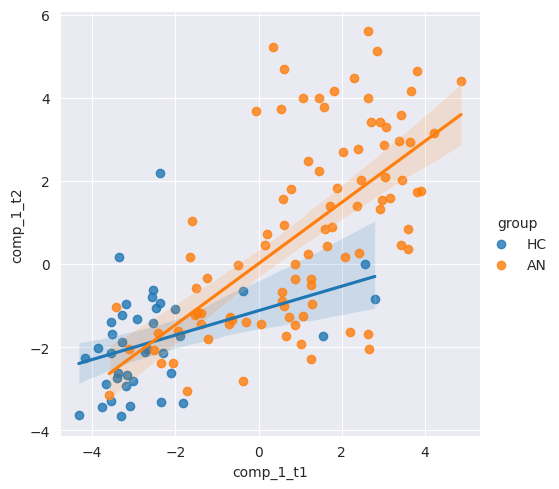

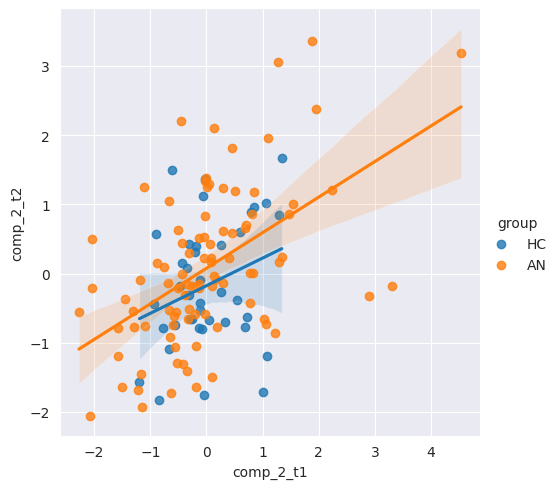

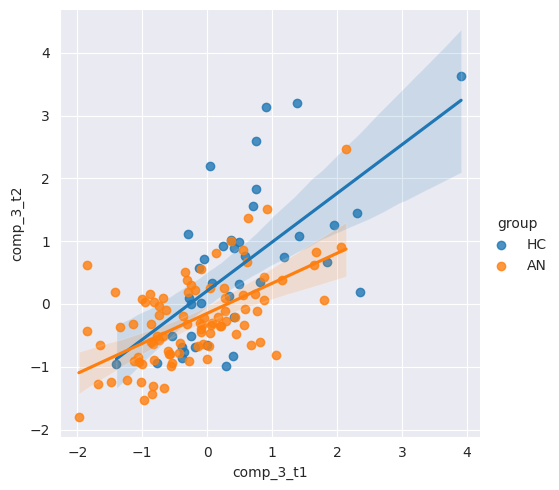

In [11]:
for component in comp:
    sns.lmplot(x=f'{component}_t1', y=f'{component}_t2', hue='group', data=pca_df)

In [12]:
groups = pca_df.groupby('group')
hc = groups.get_group('HC')
an = groups.get_group('AN')

for compent in comp:
    print('HC t1', compent, 'mean', hc[f'{compent}_t1_demean'].mean(), 'std', hc[f'{compent}_t1_demean'].std())
    print('HC t2', compent, 'mean', hc[f'{compent}_t2'].mean(), 'std', hc[f'{compent}_t2'].std(),'\n')
    print('AN t1', compent, 'mean', an[f'{compent}_t1_demean'].mean(), 'std', an[f'{compent}_t1_demean'].std())
    print('AN t2', compent, 'mean', an[f'{compent}_t2'].mean(), 'std', an[f'{compent}_t2'].std(),'\n')

HC t1 comp_1 mean -2.4997354930349673 std 1.5882322168563296
HC t2 comp_1 mean -1.8595596979641436 std 1.2137512130139658 

AN t1 comp_1 mean 1.0637172310787095 std 1.9508624605035876
AN t2 comp_1 mean 0.7913019991336783 std 2.293615818727557 

HC t1 comp_2 mean 0.021506136854517178 std 0.6512254549527074
HC t2 comp_2 mean -0.1672285434958551 std 0.9132156887707651 

AN t1 comp_2 mean -0.009151547597666936 std 1.1269450037731312
AN t2 comp_2 mean 0.07116108233866177 std 1.1192643902475443 

HC t1 comp_3 mean 0.47558306404308953 std 0.9881593097924444
HC t2 comp_3 mean 0.5785403288214481 std 1.2033019482920562 

AN t1 comp_3 mean -0.2023757719332295 std 0.8676122779331042
AN t2 comp_3 mean -0.24618737396657364 std 0.7055383684370934 



## Difference at time point one

In [13]:
az.summary(t1_models['comp_1'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group[AN],1.062,0.194,0.683,1.410,0.002,0.002,6625.0,3030.0,1.0
group[HC],-2.504,0.298,-3.066,-1.953,0.004,0.003,6113.0,3209.0,1.0
comp_1_t1_sigma,1.862,0.115,1.650,2.083,0.002,0.001,5729.0,3105.0,1.0


In [14]:
az.summary(t1_models['comp_2'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group[AN],-0.009,0.108,-0.211,0.190,0.001,0.002,6071.0,2730.0,1.0
group[HC],0.026,0.161,-0.285,0.322,0.002,0.003,6299.0,2781.0,1.0
comp_2_t1_sigma,1.016,0.062,0.911,1.143,0.001,0.001,5883.0,3211.0,1.0


In [15]:
az.summary(t1_models['comp_3'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
group[AN],-0.201,0.098,-0.385,-0.017,0.001,0.001,6146.0,2967.0,1.0
group[HC],0.476,0.146,0.199,0.747,0.002,0.001,6067.0,3024.0,1.0
comp_3_t1_sigma,0.911,0.056,0.802,1.011,0.001,0.001,5252.0,2741.0,1.0


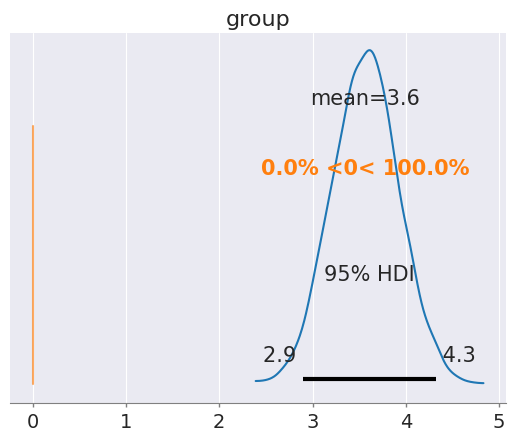

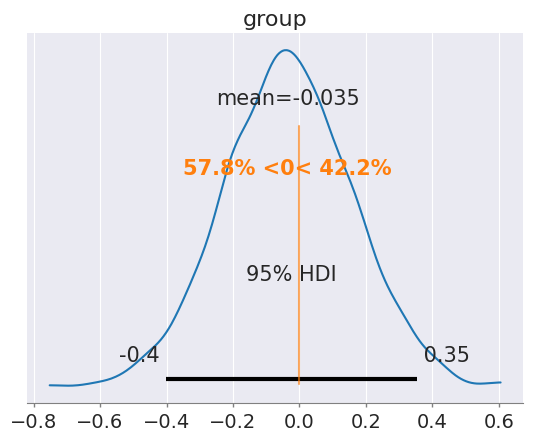

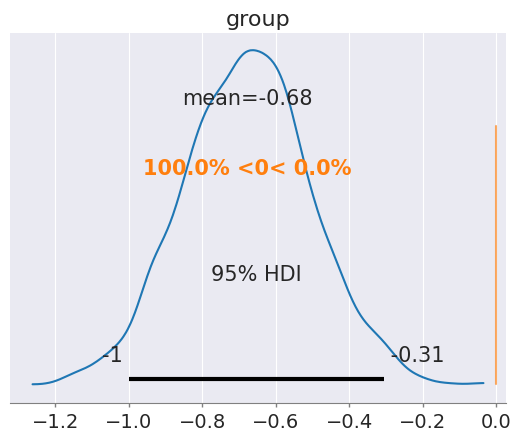

In [16]:
for model in t1_models.keys():
    post_group = t1_models[model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0, hdi_prob=0.95)

## Predictive models

In [17]:
model_summary['comp_1']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_1_t1_demean,0.479,0.909,-0.994,1.745,0.034,0.027,1089.0,902.0,1.0
group[AN],0.017,0.193,-0.298,0.336,0.002,0.003,6074.0,4408.0,1.0
group[HC],-1.037,0.496,-1.882,-0.237,0.007,0.005,5570.0,5060.0,1.0
comp_1_t1_demean|group[AN],0.249,0.910,-1.057,1.692,0.034,0.030,1082.0,907.0,1.0
comp_1_t1_demean|group[HC],-0.150,0.910,-1.487,1.269,0.034,0.029,1102.0,940.0,1.0
comp_1_t1_demean|group_sigma,1.101,0.999,0.032,2.464,0.026,0.019,1531.0,2480.0,1.0
comp_1_t2_sigma,1.643,0.102,1.477,1.811,0.001,0.001,6145.0,5134.0,1.0


In [18]:
model_summary['comp_2']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_2_t1_demean,0.429,0.741,-0.796,1.535,0.022,0.015,1522.0,1059.0,1.0
group[AN],0.075,0.098,-0.085,0.239,0.001,0.001,4685.0,4422.0,1.0
group[HC],-0.177,0.153,-0.416,0.080,0.002,0.002,4769.0,3834.0,1.0
comp_2_t1_demean|group[AN],0.084,0.741,-1.020,1.306,0.022,0.015,1528.0,1092.0,1.0
comp_2_t1_demean|group[HC],-0.009,0.744,-1.143,1.215,0.021,0.015,1522.0,1129.0,1.0
comp_2_t1_demean|group_sigma,0.879,0.977,0.014,2.183,0.024,0.017,1299.0,1771.0,1.0
comp_2_t2_sigma,0.947,0.060,0.853,1.045,0.001,0.001,4630.0,4777.0,1.0


In [19]:
model_summary['comp_3']

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
comp_3_t1_demean,0.556,0.720,-0.626,1.641,0.020,0.014,1805.0,1114.0,1.0
group[AN],-0.147,0.074,-0.271,-0.029,0.001,0.001,5290.0,4924.0,1.0
group[HC],0.216,0.124,0.013,0.417,0.002,0.001,4453.0,4431.0,1.0
comp_3_t1_demean|group[AN],-0.067,0.721,-1.147,1.131,0.019,0.016,1815.0,1084.0,1.0
comp_3_t1_demean|group[HC],0.202,0.722,-0.820,1.447,0.020,0.017,1767.0,1076.0,1.0
comp_3_t1_demean|group_sigma,0.941,0.929,0.025,2.184,0.021,0.015,1806.0,3471.0,1.0
comp_3_t2_sigma,0.705,0.044,0.634,0.776,0.001,0.000,5670.0,4643.0,1.0


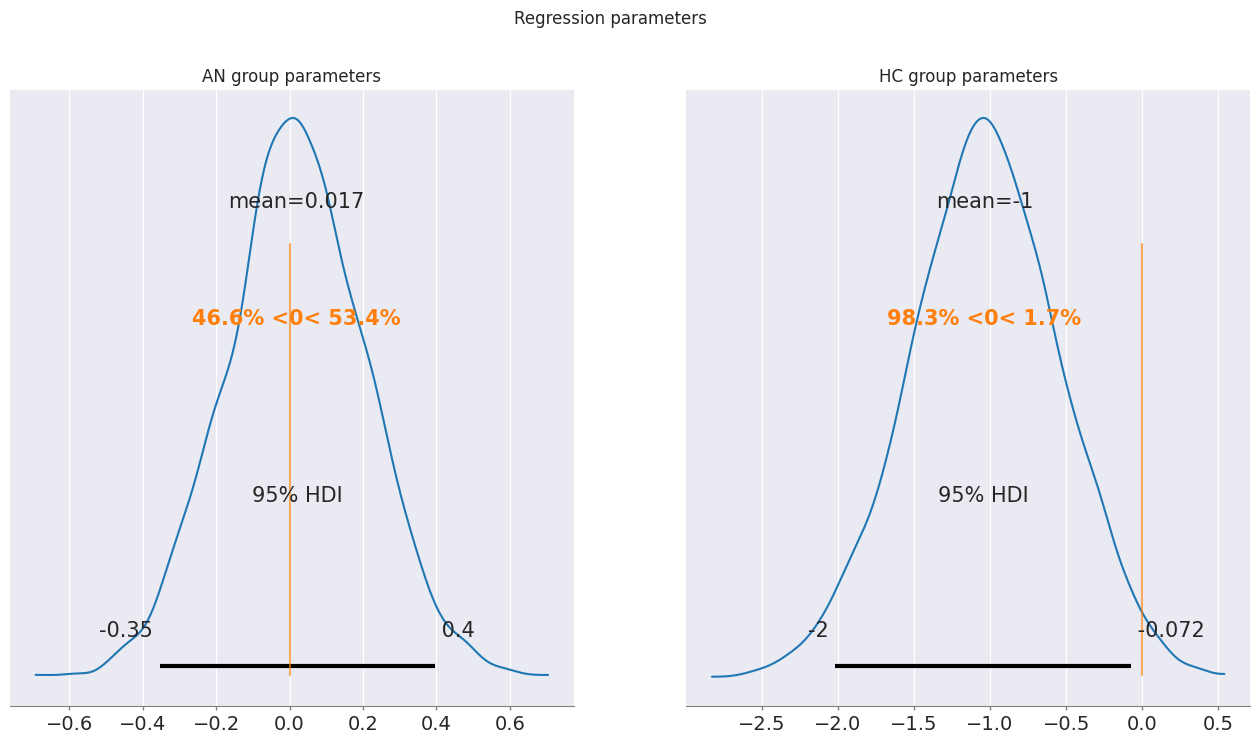

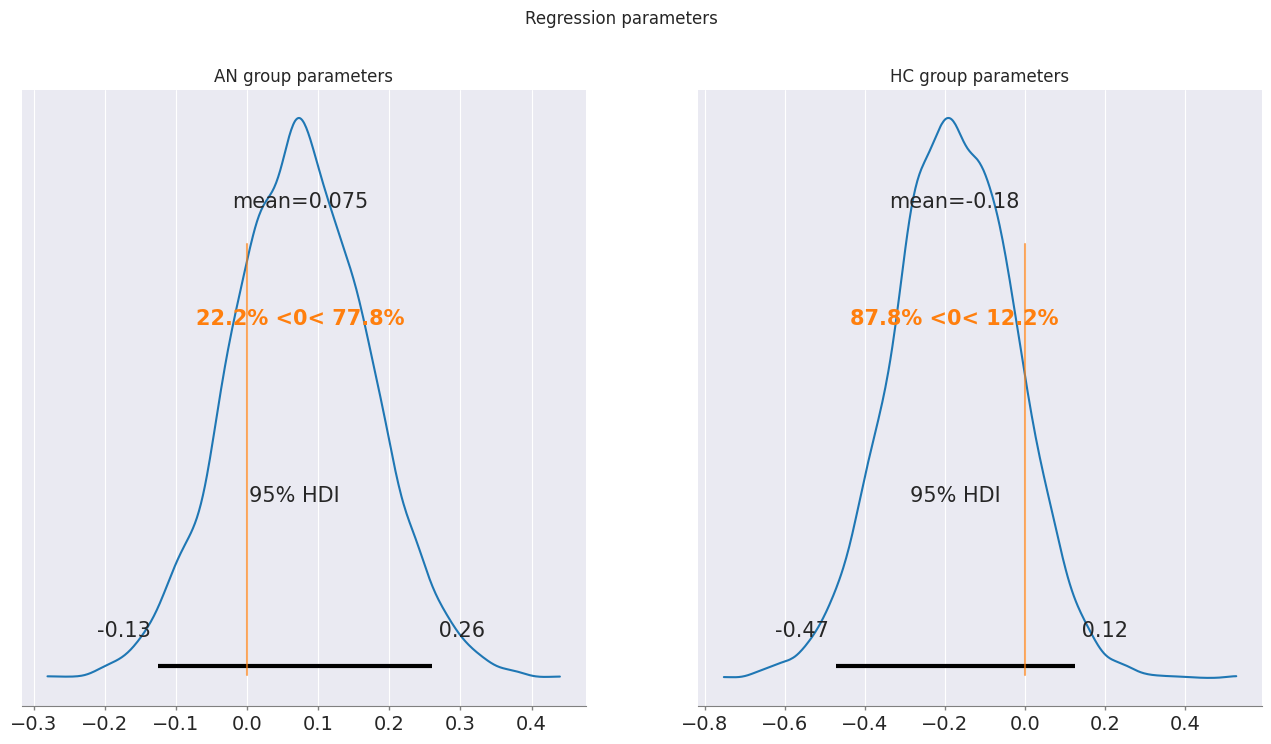

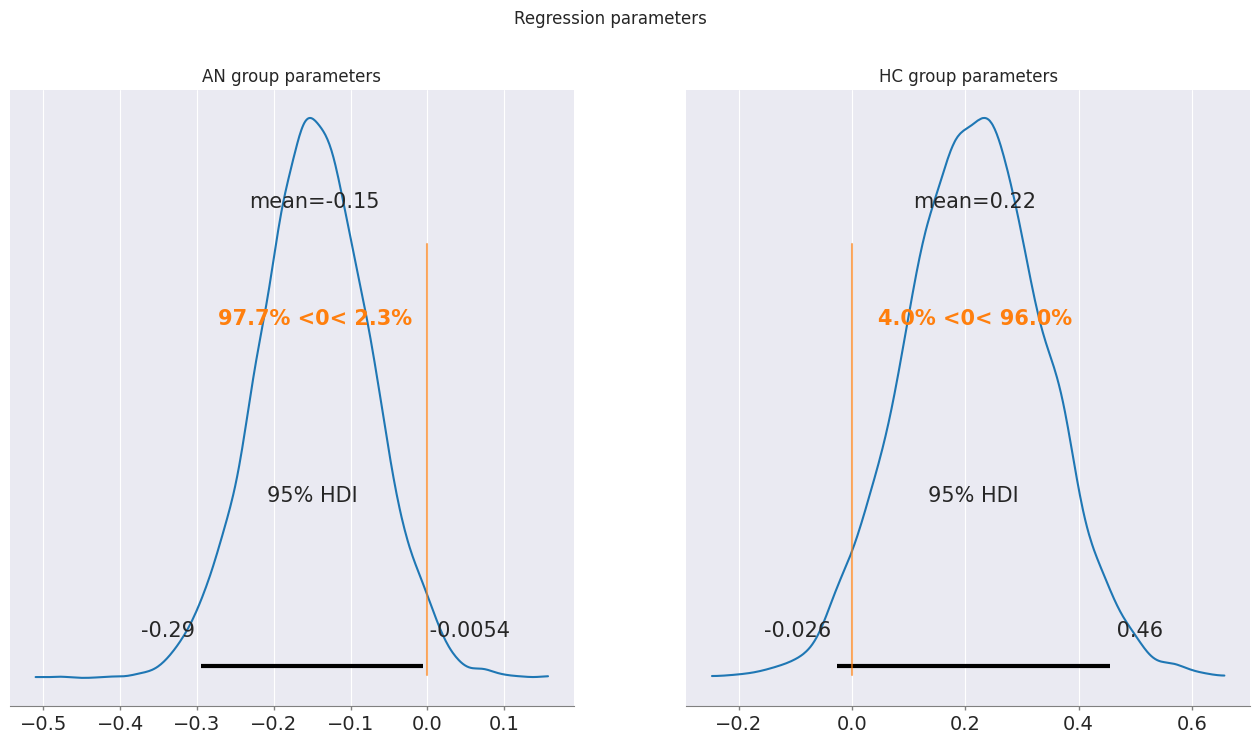

In [20]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior["group"]
    az.plot_posterior(group_parameteres.sel(group_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group parameters')
    ax[1].set_title('HC group parameters')

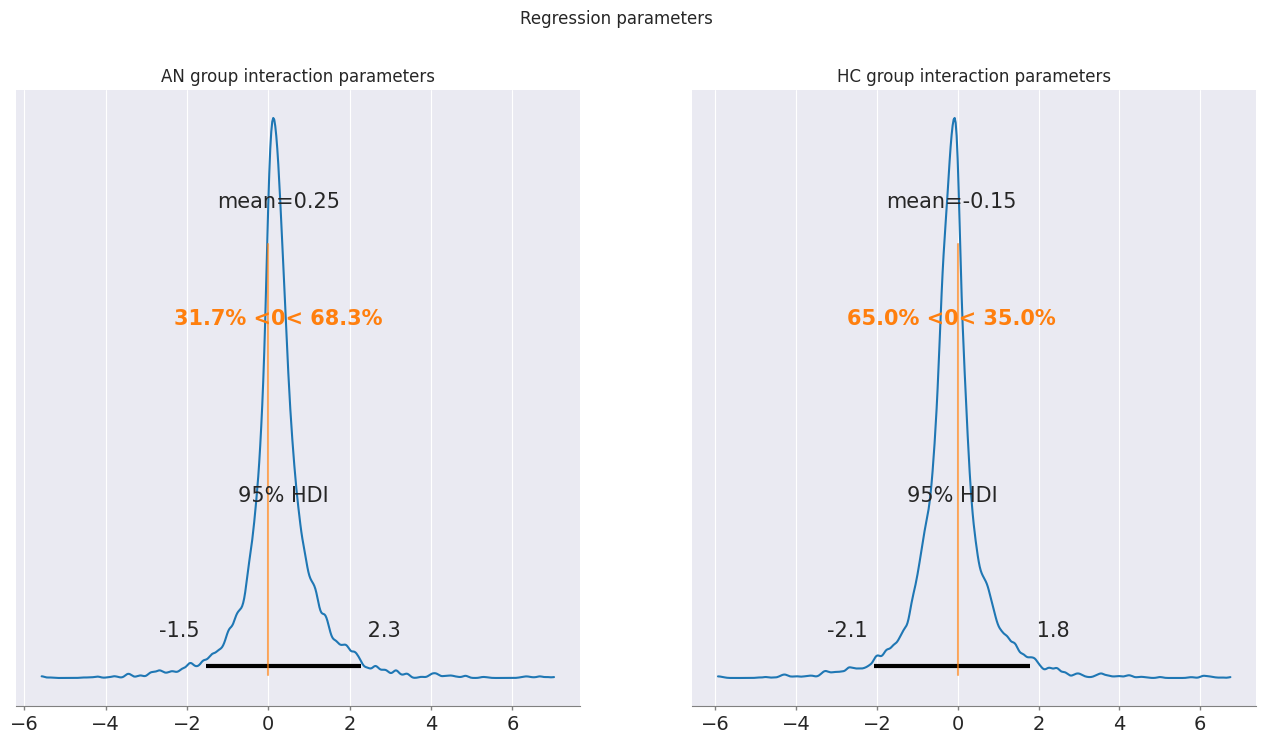

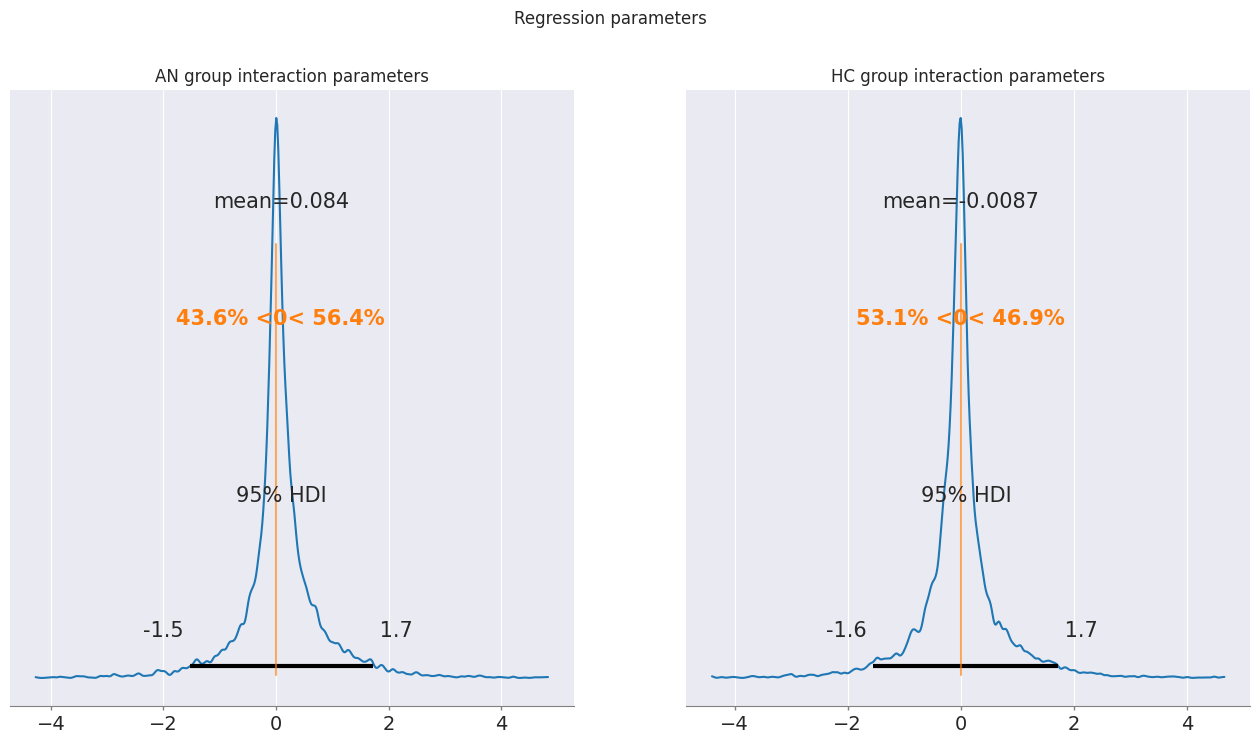

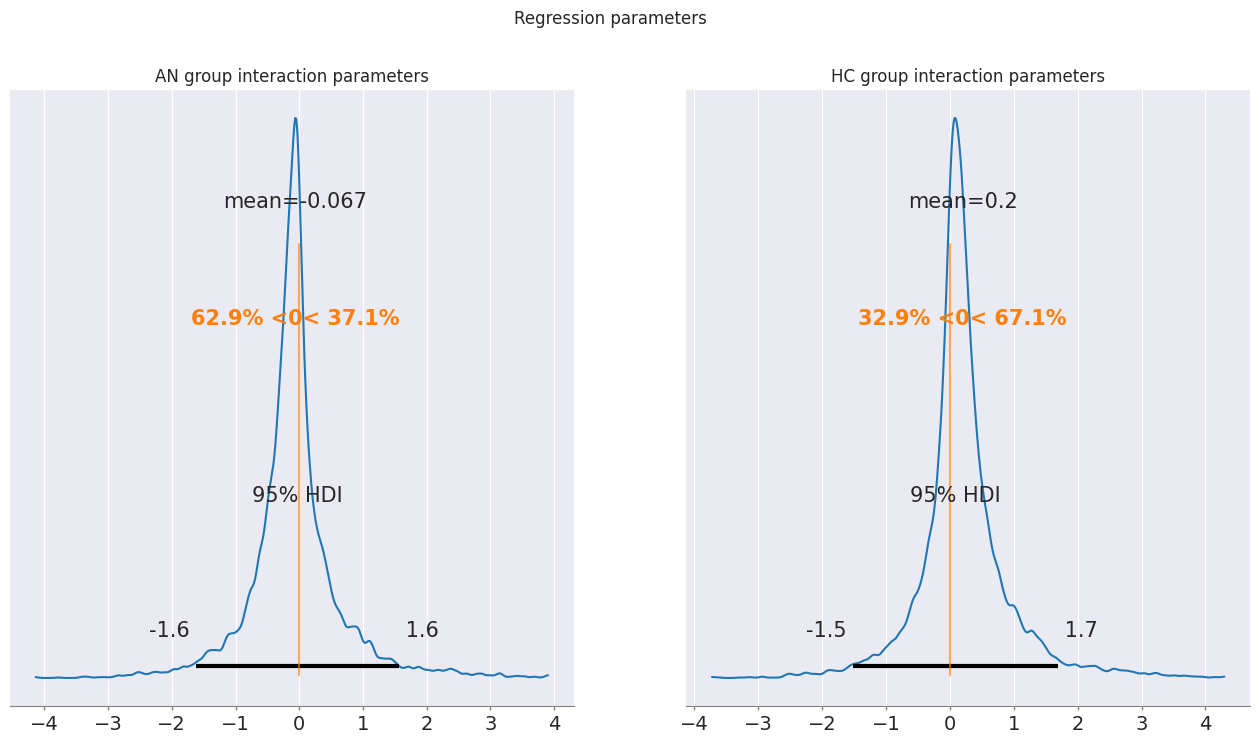

In [21]:
for component in comp:
    fig,ax = plt.subplots(1,2, figsize=(16,8))
    fig.suptitle('Regression parameters')
    group_parameteres = fitted_models['alternative'][component].posterior[f'{component}_t1_demean|group']
    az.plot_posterior(group_parameteres.sel(group__factor_dim="AN"), ref_val=0, ax = ax[0], hdi_prob=0.95)
    az.plot_posterior(group_parameteres.sel(group__factor_dim="HC"), ref_val=0, ax = ax[1], hdi_prob=0.95)
    ax[0].set_title('AN group interaction parameters')
    ax[1].set_title('HC group interaction parameters')

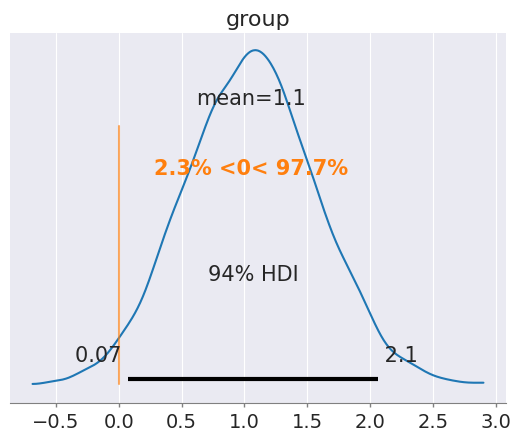

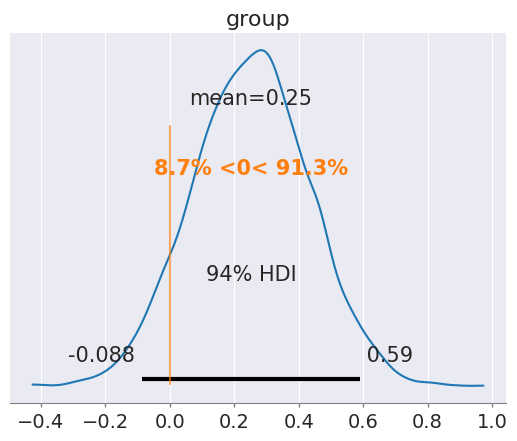

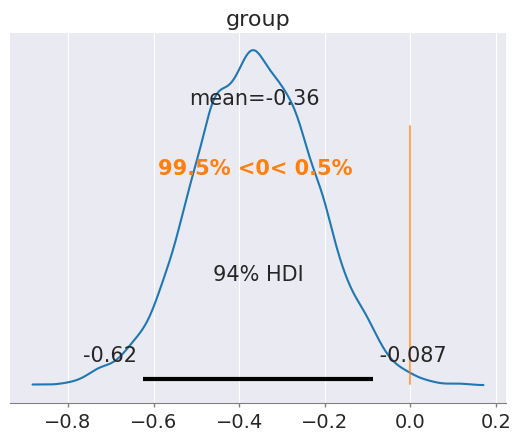

In [22]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior["group"]
    diff = post_group.sel(group_dim="AN") - post_group.sel(group_dim="HC")
    az.plot_posterior(diff, ref_val=0)

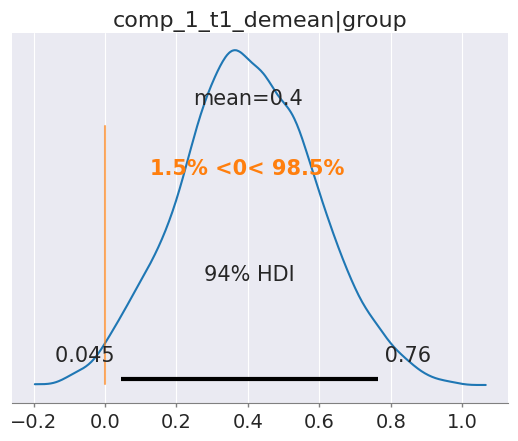

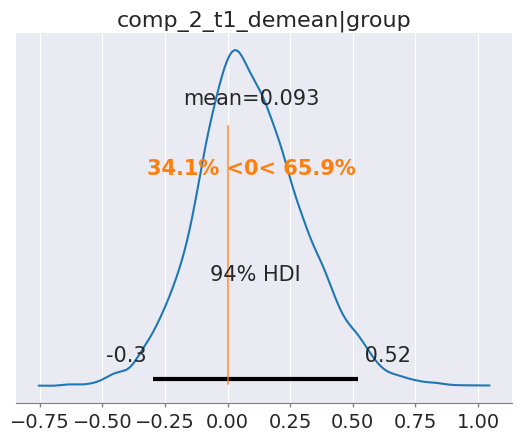

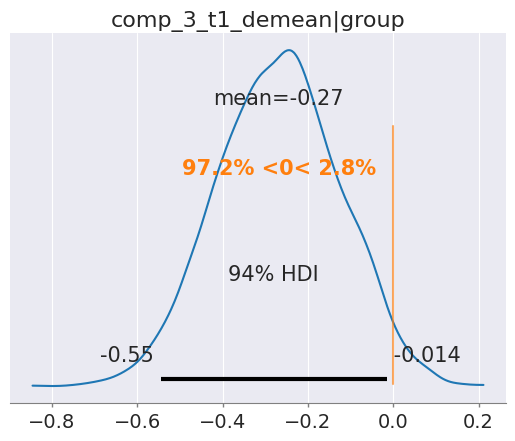

In [23]:
for model in comp:
    post_group = fitted_models['alternative'][model].posterior[f'{model}_t1_demean|group']
    diff = post_group.sel(group__factor_dim="AN") - post_group.sel(group__factor_dim="HC")
    az.plot_posterior(diff, ref_val=0)

## Model comparisons

In [4]:
model_comparisons = {}

for component in comp:
    az_comparison = az.compare({f'null_{component}' : fitted_models['null'][component], f'alternative_{component}': fitted_models['alternative'][component]})
    model_comparisons[component] = az_comparison

In [5]:
for plot in comp:
    print(model_comparisons[plot])

                    rank    elpd_loo      p_loo  elpd_diff        weight  \
alternative_comp_1     0 -258.240864   3.880522   0.000000  1.000000e+00   
null_comp_1            1 -303.444850  31.894053  45.203986  4.789058e-12   

                          se       dse  warning scale  
alternative_comp_1  9.227016  0.000000    False   log  
null_comp_1         7.104843  7.234505     True   log  
                    rank    elpd_loo      p_loo  elpd_diff    weight  \
alternative_comp_2     0 -185.296063   5.408278   0.000000  0.722875   
null_comp_2            1 -189.354762  31.880185   4.058698  0.277125   

                          se       dse  warning scale  
alternative_comp_2  8.045729  0.000000    False   log  
null_comp_2         7.751848  4.657042     True   log  
                    rank    elpd_loo      p_loo  elpd_diff    weight  \
alternative_comp_3     0 -146.500270   6.519664   0.000000  0.914049   
null_comp_3            1 -166.304341  47.483018  19.804071  0.085951   

 

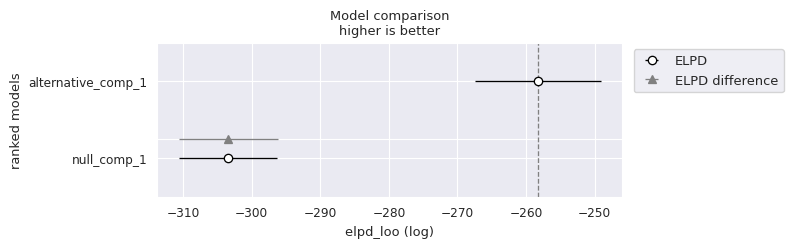

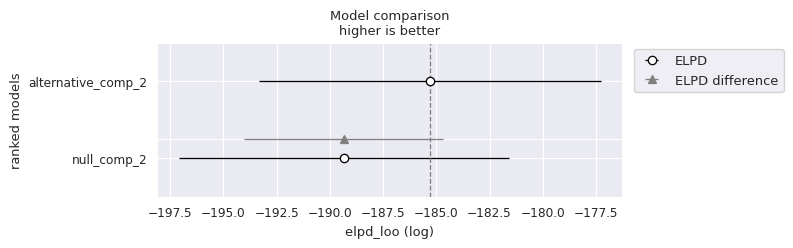

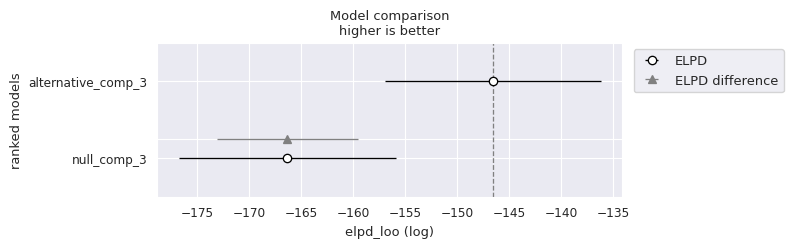

In [6]:
for plot in comp:
    az.plot_compare(model_comparisons[plot])

## Correlation co-efficents

In [27]:
for component in comp:
    print(component, 'AN', np.array(correlation_coeffients[component]['an_joint_posterior_distribution']).mean())
    print(component, 'HC', np.array(correlation_coeffients[component]['hc_joint_posterior_distribution']).mean())
    print(component, 'comp', np.array(correlation_coeffients[component]['comp_joint_posterior_distribution']).mean())

comp_1 AN 0.019226530023084446
comp_1 HC -0.2601460896160519
comp_1 comp 0.08717478288058866
comp_2 AN 0.08065129814578546
comp_2 HC -0.08724505952097025
comp_2 comp 0.18600853088745872
comp_3 AN -0.18799603788913147
comp_3 HC 0.1386842135583973
comp_3 comp 0.27888517295153


In [28]:
for component in comp:
    prob = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 > correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
    if prob > 0.5:
        print(f'Probability of AN joint posterior distribution > HC for {component} is ', prob * 100, '\n')
    if prob < 0.5:
         prob_max = (correlation_coeffients[component]['an_joint_posterior_distribution'] ** 2 < correlation_coeffients[component]['hc_joint_posterior_distribution']  ** 2).mean().item()
         print(f'Probability of HC joint posterior distribution > AN for {component} is ', prob_max * 100, '\n')

Probability of HC joint posterior distribution > AN for comp_1 is  70.6375 

Probability of AN joint posterior distribution > HC for comp_2 is  52.65 

Probability of AN joint posterior distribution > HC for comp_3 is  65.3625 



Text(0, 0.5, 'AN')

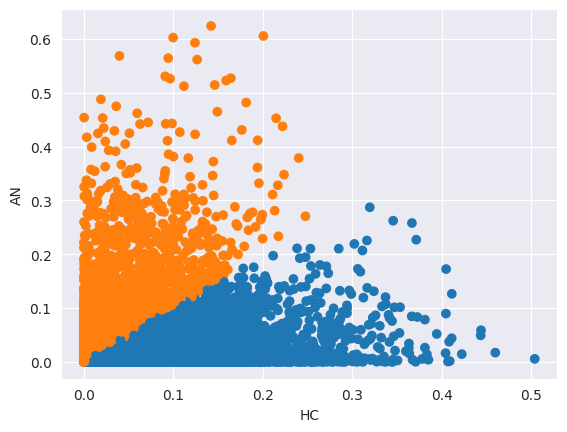

In [29]:
sq_partial_an_comp_1 = correlation_coeffients['comp_1']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_1 = correlation_coeffients['comp_1']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_1 > sq_partial_hc_comp_1, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_1, y=sq_partial_an_comp_1, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

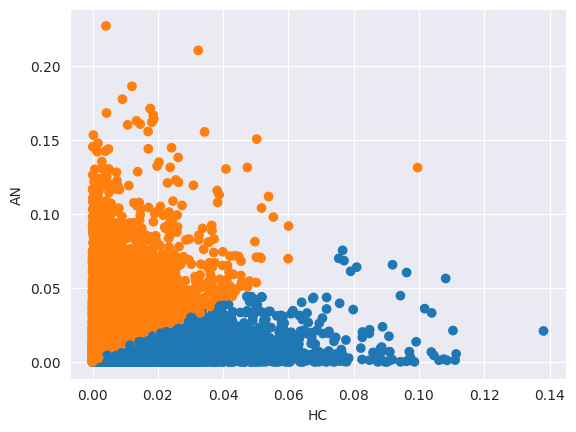

In [30]:
sq_partial_an_comp_2 = correlation_coeffients['comp_2']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_2 = correlation_coeffients['comp_2']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_2 > sq_partial_hc_comp_2, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_2, y=sq_partial_an_comp_2, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")

Text(0, 0.5, 'AN')

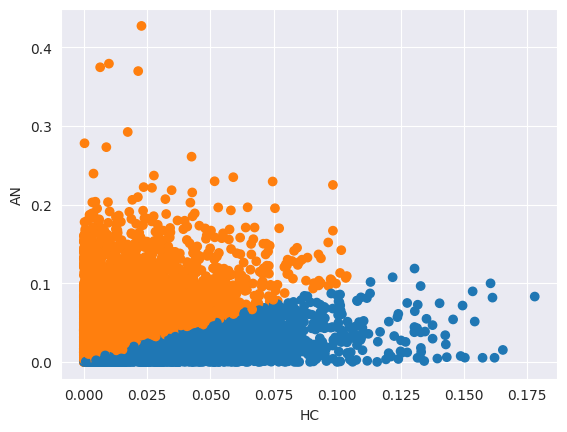

In [31]:
sq_partial_an_comp_3 = correlation_coeffients['comp_3']['an_joint_posterior_distribution'] ** 2
sq_partial_hc_comp_3 = correlation_coeffients['comp_3']['hc_joint_posterior_distribution']  ** 2

colors = np.where(sq_partial_an_comp_3 > sq_partial_hc_comp_3, "C1", "C0").flatten().tolist()

plt.scatter(x=sq_partial_hc_comp_3, y=sq_partial_an_comp_3, c=colors)
plt.xlabel("HC")
plt.ylabel("AN")